# Plotting model performance on data with more layers

importing Jupyter notebook from dataset.ipynb
Fold 0 - MSE: 0.0751, R2: 0.5353
Fold 1 - MSE: 0.0508, R2: 0.7400
Fold 2 - MSE: 0.0480, R2: 0.6501
Fold 3 - MSE: 0.0642, R2: 0.6184
Fold 4 - MSE: 0.0899, R2: 0.4922
MSE: 0.05076024973130493; R2: 0.740020344312416
Evaluation of best model - MSE: 0.0598, R2: 0.5917
[ 1.20609937 -0.00325955  0.02550942 -0.02607641 -0.0470548  -0.02607641
  0.07548245  0.08330925 -0.13952506 -0.04883266  0.02956602 -0.0065191
 -0.0065191  -0.0065191  -0.0065191 ]
-0.36914227803057925
Fitting 3 folds for each of 75 candidates, totalling 225 fits
Evaluation of best model - MSE: 0.0534, R2: 0.6351
Fold 0 - MSE: 0.0689, R2: 0.5741
Fold 1 - MSE: 0.0402, R2: 0.7941
Fold 2 - MSE: 0.0494, R2: 0.6396
Fold 3 - MSE: 0.0653, R2: 0.6124
Fold 4 - MSE: 0.0835, R2: 0.5282
MSE: 0.04019848247062897; R2: 0.7941147317596375
Evaluation of best model - MSE: 0.0594, R2: 0.5941
Fitting 3 folds for each of 75 candidates, totalling 225 fits
with hyperparameters and kfold: MSE: 0.0693263

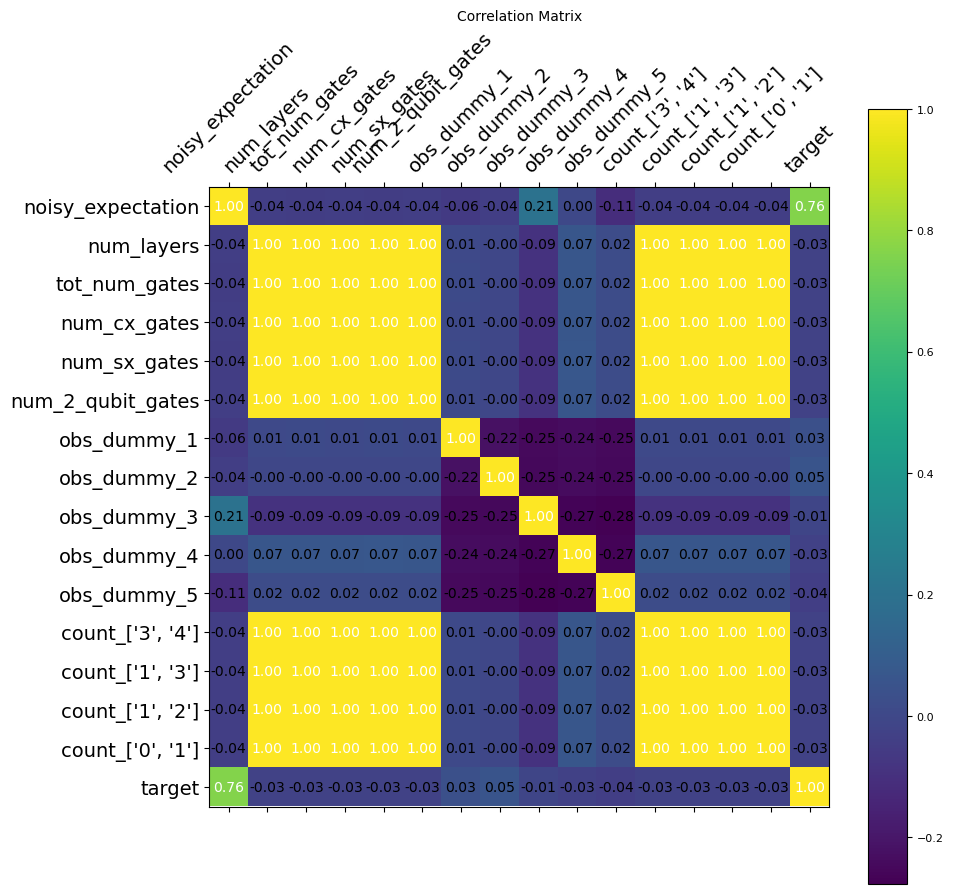

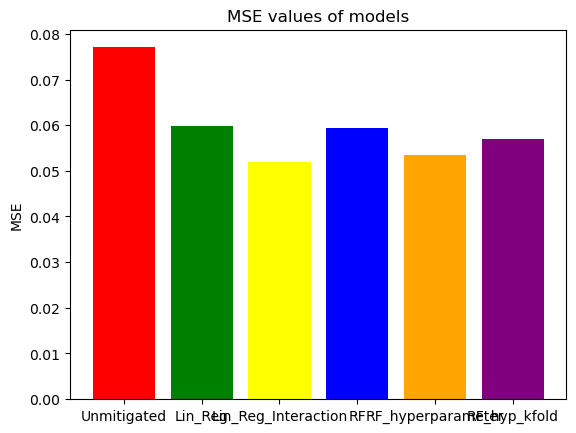

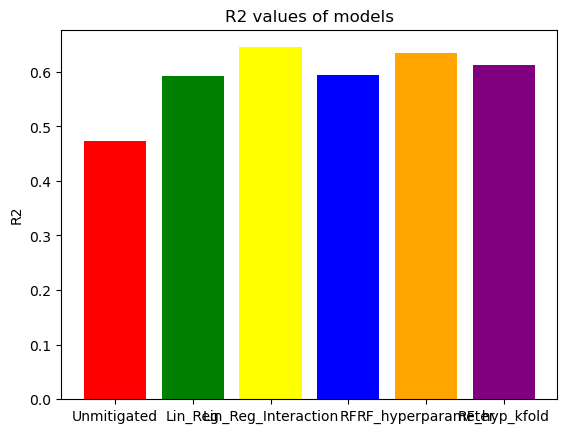

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb
import dataset

In [4]:
# %run dataset.ipynb  # allows to use defined functions from other notebook

### for now used eval dataset produced from old pickle files and added new ones with more layers

In [13]:
model_lr, _, _ = dataset.Linear_Reg()
model_rf, _, _ = dataset.Random_Forest()

training_feature_names = dataset.X_train[0].columns

_, old_pickle_files = dataset.split_data()
_, new_pickle_files = dataset.split_data(path='./extrapolation', train_frac=0) # path to pickle files with different num_layers
y_eval_ipol = dataset.file_to_data(old_pickle_files)    # is df

a = list()
for i, idx in enumerate(new_pickle_files):
    a.append(dataset.extract_features(f"./extrapolation/{idx}"))
df = pd.DataFrame(a)

y_eval_ipol = pd.concat([y_eval_ipol, df])
display(y_eval_ipol)

y_ipol_pred_lr = model_lr.predict(y_eval_ipol.drop(columns='target')[training_feature_names])
y_ipol_pred_rf = model_rf.predict(y_eval_ipol.drop(columns='target')[training_feature_names])

Fold 0 - MSE: 0.0751, R2: 0.5353
Fold 1 - MSE: 0.0508, R2: 0.7400
Fold 2 - MSE: 0.0480, R2: 0.6501
Fold 3 - MSE: 0.0642, R2: 0.6184
Fold 4 - MSE: 0.0899, R2: 0.4922
Fold 0 - MSE: 0.0684, R2: 0.5769
Fold 1 - MSE: 0.0407, R2: 0.7917
Fold 2 - MSE: 0.0480, R2: 0.6503
Fold 3 - MSE: 0.0650, R2: 0.6140
Fold 4 - MSE: 0.0840, R2: 0.5257


,noisy_expectation,num_layers,tot_num_gates,num_cx_gates,num_sx_gates,num_2_qubit_gates,obs_dummy_1,obs_dummy_2,obs_dummy_3,obs_dummy_4,obs_dummy_5,"count_['0', '1']","count_['1', '2']","count_['1', '3']","count_['3', '4']",target
0,-0.05674,3,134,24,36,24,0,0,0,1,0,6,6,6,6,-0.071647
1,-0.02604,5,207,40,56,40,0,0,0,1,0,10,10,10,10,0.429966
2,0.07860,5,208,40,56,40,0,1,0,0,0,10,10,10,10,-0.714535
3,0.15654,1,57,8,15,8,0,0,1,0,0,2,2,2,2,-0.043087
4,0.06256,3,133,24,36,24,0,0,0,1,0,6,6,6,6,0.347771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.09182,6,242,48,65,48,0,0,0,1,0,12,12,12,12,0.144437
496,0.23502,8,316,64,85,64,0,0,0,0,1,16,16,16,16,0.385167
497,0.02904,8,319,64,86,64,1,0,0,0,0,16,16,16,16,-0.626661
498,0.20356,7,281,56,76,56,0,0,1,0,0,14,14,14,14,0.119119


Text(0.5, 1.0, 'Error interpolation of models')

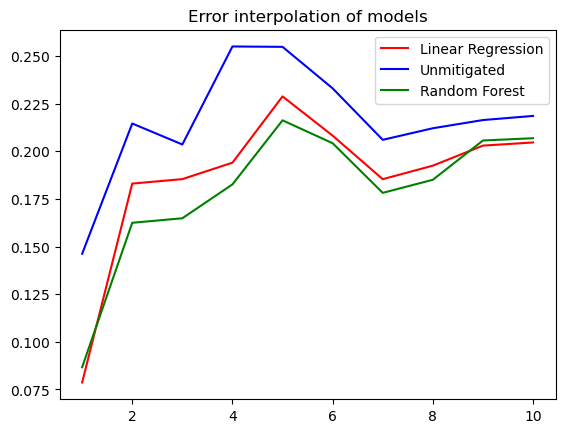

In [14]:
error_arr_unmi = []
error_arr_lr = []
error_arr_rf = []

x = range(1,11)

for j in x:
    # calculate errors for each number of layer
    y_cor_layers = y_eval_ipol['num_layers'] == j
    y_cor_layers_pred_lr = y_ipol_pred_lr[np.array(y_cor_layers)]
    y_cor_layers_pred_rf = y_ipol_pred_rf[np.array(y_cor_layers)]
    y_cor_layers_target = y_eval_ipol[np.array(y_cor_layers)]['target']
    
    # calculate mean error of unmitigated model
    error_unmi = sum(np.abs(y_eval_ipol[np.array(y_cor_layers)]['noisy_expectation'] - y_cor_layers_target))
    error_unmi /= y_cor_layers.sum()
    error_arr_unmi.append(error_unmi)
    
    # calculate mean error of LR model
    error = sum(np.abs(y_cor_layers_pred_lr - y_cor_layers_target))
    error /= y_cor_layers.sum()
    error_arr_lr.append(error)

    # calculate mean error of RF model
    error = sum(np.abs(y_cor_layers_pred_rf - y_cor_layers_target))
    error /= y_cor_layers.sum()
    error_arr_rf.append(error)


plt.plot(x, error_arr_lr, color='red', label = 'Linear Regression')
plt.plot(x, error_arr_unmi, color='blue', label = 'Unmitigated')
plt.plot(x, error_arr_rf, color='green', label = 'Random Forest')
plt.legend()
plt.title('Error interpolation of models')
